In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import zipfile
import gdown

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
# Read dataset
file_id = '1sECqH1a-QtbPcVWvF6_ATP4vA2ISe6Mb'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
output = '/content/dataset.zip'
gdown.download(download_url, output, quiet=False)


with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('data')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1sECqH1a-QtbPcVWvF6_ATP4vA2ISe6Mb
From (redirected): https://drive.google.com/uc?export=download&id=1sECqH1a-QtbPcVWvF6_ATP4vA2ISe6Mb&confirm=t&uuid=d6e6054c-a974-4d5a-9c2f-155b9bcc5eef
To: /content/dataset.zip
100%|██████████| 912M/912M [00:17<00:00, 51.6MB/s]


In [4]:
# Dataset Splitting

import os
import shutil
import random

def split_data(SOURCE='', TRAINING='', TEST='', TRAIN_SPLIT=0.8):
    classes = os.listdir(SOURCE)
    for class_name in classes:
        class_dir = os.path.join(SOURCE, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)

        train_size = int(len(images) * TRAIN_SPLIT)
        #val_size = int(len(images) * VAL_SPLIT)

        train_images = images[:train_size]
        #val_images = images[train_size:train_size + val_size]
        test_images = images[train_size:] # train_size + val_size

        train_class_dir = os.path.join(TRAINING, class_name)
        #val_class_dir = os.path.join(VALIDATION, class_name)
        test_class_dir = os.path.join(TEST, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        #os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        for img in train_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)


        for img in test_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(test_class_dir, img)
            shutil.copy(src, dst)

# Define the base directory
base_dir = 'data/Fruits_Vegetables_Dataset(12000)'

# Define the new directories
new_base_dir = 'data/split_dataset'
train_dir = os.path.join(new_base_dir, 'train')
# validation_dir = os.path.join(new_base_dir, 'validation')
test_dir = os.path.join(new_base_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
# os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the source directories for fruits and vegetables
fruit_source_dir = os.path.join(base_dir, 'Fruits')
vegetable_source_dir = os.path.join(base_dir, 'Vegetables')

# Split and copy images for fruits and vegetables
split_data(SOURCE=fruit_source_dir, TRAINING=train_dir, TEST=test_dir, TRAIN_SPLIT=0.8) # VALIDATION=validation_dir,  VAL_SPLIT=0.15
split_data(SOURCE=vegetable_source_dir, TRAINING=train_dir, TEST=test_dir, TRAIN_SPLIT=0.8) # VALIDATION=validation_dir,  VAL_SPLIT=0.15

# Function to count images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Print the number of images in each directory
print('Number of images in train directory:', count_images(train_dir))
#print('Number of images in validation directory:', count_images(validation_dir))
print('Number of images in test directory:', count_images(test_dir))

# Print the number of images in each class for train, validation, and test directories
print('Training data per class:', count_images_per_class(train_dir))
#print('Validation data per class:', count_images_per_class(validation_dir))
print('Test data per class:', count_images_per_class(test_dir))

# Preview images in each class (first 10 images)
def preview_images(directory, class_name):
    class_dir = os.path.join(directory, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        print(f'{class_name} files:', images[:10])

# Example of previewing images
for class_name in os.listdir(train_dir):
    preview_images(train_dir, class_name)
# for class_name in os.listdir(validation_dir):
#     preview_images(validation_dir, class_name)
# for class_name in os.listdir(test_dir):
#     preview_images(test_dir, class_name)

Number of images in train directory: 9592
Number of images in test directory: 2408
Training data per class: {'FreshStrawberry': 482, 'FreshBanana': 499, 'FreshOrange': 487, 'RottenStrawberry': 476, 'RottenPotato': 468, 'RottenApple': 470, 'RottenBellpepper': 472, 'RottenTomato': 476, 'FreshMango': 484, 'RottenCarrot': 464, 'RottenBanana': 460, 'FreshPotato': 492, 'RottenMango': 474, 'FreshTomato': 483, 'FreshBellpepper': 488, 'FreshCarrot': 496, 'FreshApple': 489, 'FreshCucumber': 486, 'RottenCucumber': 474, 'RottenOrange': 472}
Test data per class: {'FreshStrawberry': 121, 'FreshBanana': 125, 'FreshOrange': 122, 'RottenStrawberry': 120, 'RottenPotato': 117, 'RottenApple': 118, 'RottenBellpepper': 119, 'RottenTomato': 120, 'FreshMango': 121, 'RottenCarrot': 116, 'RottenBanana': 116, 'FreshPotato': 123, 'RottenMango': 119, 'FreshTomato': 121, 'FreshBellpepper': 123, 'FreshCarrot': 124, 'FreshApple': 123, 'FreshCucumber': 122, 'RottenCucumber': 119, 'RottenOrange': 119}
FreshStrawberry f

In [5]:
# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

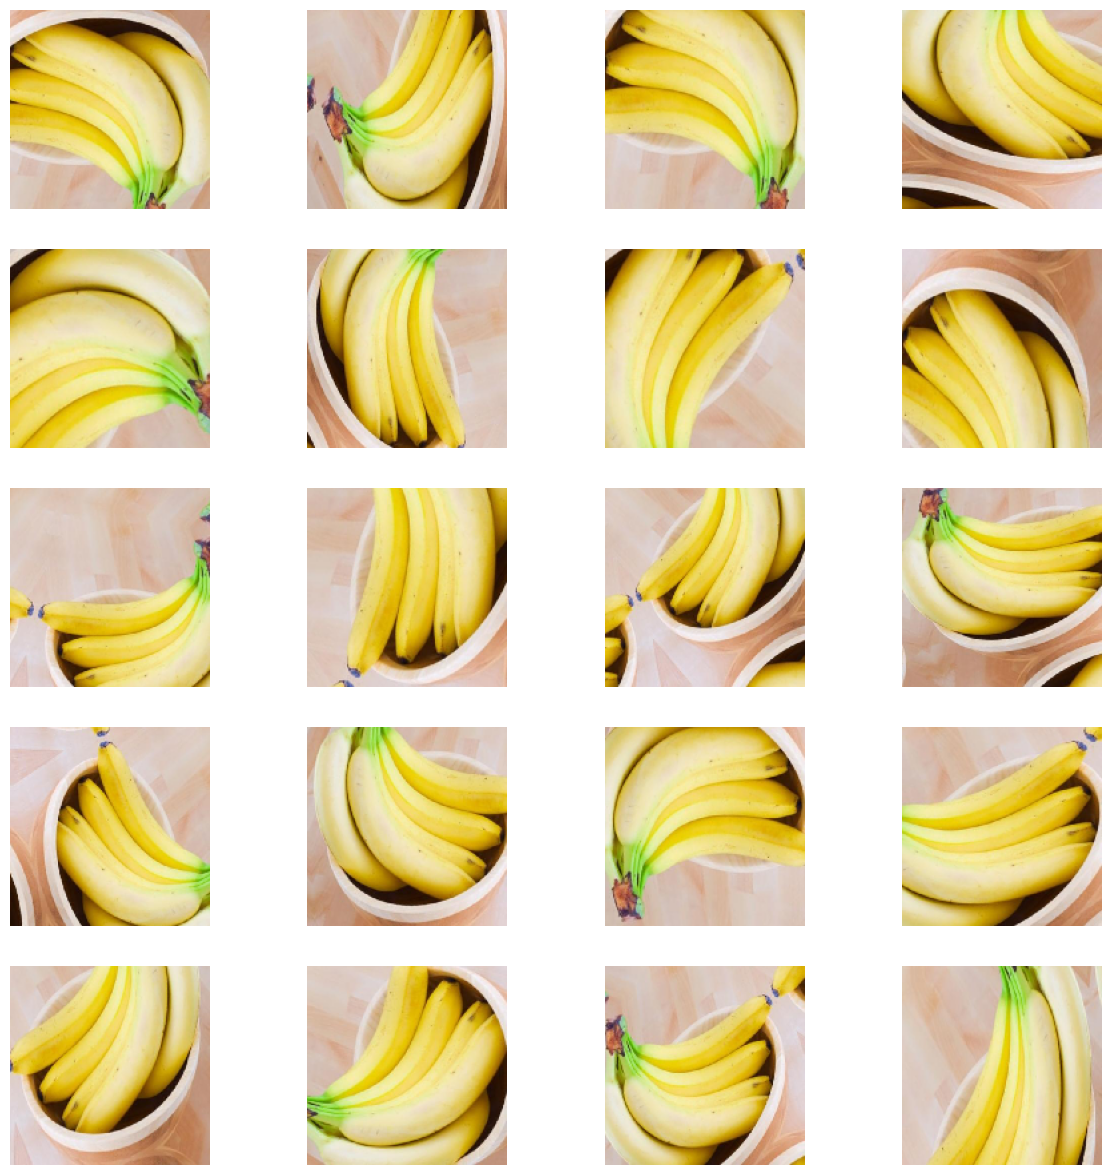

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

train_fresh_dir = os.path.join('data/split_dataset/train/FreshBanana')
preview_dir = 'data/preview'
os.makedirs(preview_dir, exist_ok=True)

# Load an image from the training directory
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

# Generate augmented images and save to preview directory
i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpg'):
    i += 1
    if i >= 20:
        break

# List the generated images
preview_img = os.listdir(preview_dir)

# Plot the augmented images
plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot((len(preview_img)//4)+0, 4, n+1)
    plt.subplots_adjust(wspace=0.1, hspace = 0.2)
    plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150),
                              interpolation="nearest"))
    plt.axis('off')
plt.show()

# Clean up preview directory
for fn in preview_img:
    os.remove(os.path.join(preview_dir, fn))

In [7]:
# Create image generators for training, validation, and test datasets
base_dir = 'data/split_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')


# Define batch size and target size
batch_size = 100
target_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)



Found 9581 images belonging to 20 classes.
Found 2405 images belonging to 20 classes.


In [8]:
# Create Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(20, activation='softmax')  # Output layer for single-label multi-class classification
])

# Compile Model
model.compile(
    loss='categorical_crossentropy',  # Loss function for single-label multi-class classification
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
# Checkpoint Implementation to Continue from Previous Training if Stopped
checkpoint_dir = '/content/drive/MyDrive/StandardCheckpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_dir, "ckpt_{epoch:02d}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)

latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    print(f"Restored model from {latest_checkpoint}")
else:
    print("Starting training from scratch.")


Restored model from /content/drive/MyDrive/StandardCheckpoints/ckpt_02


In [10]:
# Model Compilation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint_callback]
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9199
Epoch 1: saving model to /content/drive/MyDrive/StandardCheckpoints/ckpt_01
95/95 [==============================] - 674s 7s/step - loss: 0.2486 - accuracy: 0.9199 - val_loss: 0.1696 - val_accuracy: 0.9400


In [19]:
# Evaluate Current Model Accuracy for Training
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

96/96 [==============================] - 254s 3s/step - loss: 0.1790 - accuracy: 0.9386
Loss: 0.1790
Accuracy: 0.9386


In [28]:
# Evaluate Current Model Accuracy for Validation
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

25/25 [==============================] - 63s 2s/step - loss: 0.1709 - accuracy: 0.9397
Loss: 0.1709
Accuracy: 0.9397


In [20]:
# Confusion Matrix to Determine Performance Between Actual Data
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(validation_generator.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

25/25 [==============================] - 50s 2s/step
Confusion Matrix
[[ 7  4  4  8  8  2 10  9  9  6  5  9  6  3  4  6  7  5  6  5]
 [ 6 10  3  7  0 10  7  3  4  5  6  7  7  8  9  6 13  3  6  5]
 [ 6  4  5  9  6  8  7  8  7  7  6  9  4  2  8  5  3  8  8  3]
 [ 2  4  9  3 11  8  7  5  9  6  6  5 11  7  3  4  4  3  5 12]
 [ 9  8  3  6  4  7 10  8  7  6  6  8  6  6  6  8  1  3  5  5]
 [ 6  5  5  4  8  7  9  3  6  2  3  6  6  9  6  5  7 12  5  7]
 [ 3  8 15  3  1  8  3  8  5  4  4  5 10 10  7 10  6  4  5  3]
 [ 4  7  4  4 14  5  4 10  5  4  5  3  4  8  9  9  6  3  7  8]
 [ 9  8  3  8  8  4  6  9  8  4  4  5  6  4  8  3  6  8  3  7]
 [ 8  3  2  5  1  6  4  7  5  6  6  6  6  7 11  5  6  9  9  9]
 [ 7  6  5  9  9  6  7  3  6  4  4  2  5  2  8  9  6  6  8  5]
 [ 6  3  7  4  4  6  5  5  6 10  6  4  4  7  6  5  9  5  8  5]
 [ 9  6  5  7  6  3  9  2  4  8  9 11  5  4  7  3  5  8  5  3]
 [ 6  5  3  4  5  8  3  4  2  7  8  4 14  7  5  3  4 12  4  8]
 [ 4  8  4  7  7  9  6  6 11  5  2  5  3  5  4  

In [21]:
# Labels Defined to Convert Encoded Array into Classification
class_labels = validation_generator.class_indices
labels = [None] * len(class_labels)
for label, index in class_labels.items():
    labels[index] = label

print(labels)

['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot', 'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenCarrot', 'RottenCucumber', 'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']


Saving download (1).jpeg to download (1).jpeg
Saving Bunch-of-bananas-67e91d5.jpg to Bunch-of-bananas-67e91d5 (1).jpg
1/1 [==============================] - 0s 36ms/step
Filename: download (1).jpeg
Prediction: RottenPotato
1/1 [==============================] - 0s 35ms/step
Filename: Bunch-of-bananas-67e91d5 (1).jpg
Prediction: FreshBanana


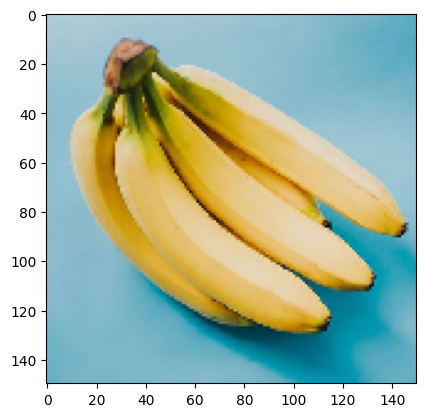

In [29]:
# Test Model with Input Images

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Upload files
uploaded = files.upload()

# Set image size
img_width, img_height = 150, 150


for fn in uploaded.keys():
    # Process the image
    path = fn
    img = load_img(path, target_size=(img_width, img_height))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    # Merge images if more than one (in this case, there's only one image per iteration)
    images = np.vstack([x])

    # Predict the image
    prediction = model.predict(images, batch_size=32)
    index = np.argmax(prediction)
    classes = labels[index]


    # Show the prediction
    print(f"Filename: {fn}")
    print(f"Prediction: {classes}")


In [31]:
model.save('fruit_vegetable_classifier.h5')
print("Model saved to fruit_vegetable_classifier.h5")

from google.colab import files

# Download the model
files.download('fruit_vegetable_classifier.h5')

Model saved to fruit_vegetable_classifier.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>